# $D_{sJ}$​ states production research at LHCb in $pp$ collisions at $\sqrt{s}=13 \text{ } \mathrm{TeV}$ 
## $D_{s0}^+$ yields
### MonteCarlo analysis
#### Event Mixing algorithm over MC and Data samples

Iván Cambón Bouzas

Instituto Galego de Física de Altas Enerxías

Universidade de Santiago de Compostela



In [1]:
import ROOT 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sys
import os
import vector as vec
import itertools as iter
ROOT.EnableImplicitMT()
sys.path.append('/home3/ivan.cambon/Python_Modules/RooPyShort')
import RooPyShort as rsh

ROOT.gROOT.ProcessLine(".L lhcbStyle.C")
ROOT.lhcbStyle()


print(datetime.now())

Welcome to JupyROOT 6.26/06
2023-09-13 13:11:35.023909-------------------------
Set LHCb Style - May 2021
-------------------------



In [2]:
if not os.path.exists("./Graphs"):
    os.makedirs("./Graphs")
else:
    print("Graphs directory already exists")

## RDataFrame definition

In [3]:
Data_MagU18_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/MagUp/2018/'
Data_MagD18_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/MagDown/2018/'
Data_MagD17_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/Data/MagDown/2017/'

Data_files = "DsJ_*_28.root"
dtt = "DsPi02ggTuple"

nfiles = len(os.listdir(Data_MagU18_path))

data_for_train = set([Data_MagU18_path+"DsJ_Data_MagU18_"+str(i)+".root" for i in range(int(nfiles/5))])

tdf_data = ROOT.RDataFrame(dtt+"/DecayTree", data_for_train)

#tdf_data = ROOT.RDataFrame(dtt+"/DecayTree", Data_MagU18_path+Data_files)

tdf_data = tdf_data.Define("Ds0M","Ds0_M-Ds_M+1969-piz_M+135")

sel = "abs(piz_M-135)<15 && piz_PT>1100 && gamma_1_CL>0.5 && gamma_2_CL>0.5 && abs(Ds_M-1969)<20 && nPVs==1"

tdf_data = tdf_data.Filter(sel)

## $\mathtt{pd.DataFrame}$ conversion

(array([ 247.,  247.,  256.,  279.,  322.,  325.,  353.,  426.,  489.,
         481.,  588.,  677.,  775.,  922., 1048., 1206., 1350., 1609.,
        1808., 2049., 2243., 2654., 2849., 3004., 3262., 3472., 3807.,
        3977., 4017., 4136., 4070., 3984., 3839., 3763., 3502., 3342.,
        3075., 2850., 2535., 2231., 1979., 1800., 1641., 1395., 1146.,
         999.,  858.,  759.,  595.,  530.,  497.,  455.,  382.,  283.,
         281.,  258.,  224.,  215.,  211.,  214.]),
 array([1949.00192406, 1949.66845706, 1950.33499006, 1951.00152306,
        1951.66805606, 1952.33458905, 1953.00112205, 1953.66765505,
        1954.33418805, 1955.00072105, 1955.66725405, 1956.33378704,
        1957.00032004, 1957.66685304, 1958.33338604, 1958.99991904,
        1959.66645204, 1960.33298503, 1960.99951803, 1961.66605103,
        1962.33258403, 1962.99911703, 1963.66565003, 1964.33218302,
        1964.99871602, 1965.66524902, 1966.33178202, 1966.99831502,
        1967.66484802, 1968.33138101, 1968.997

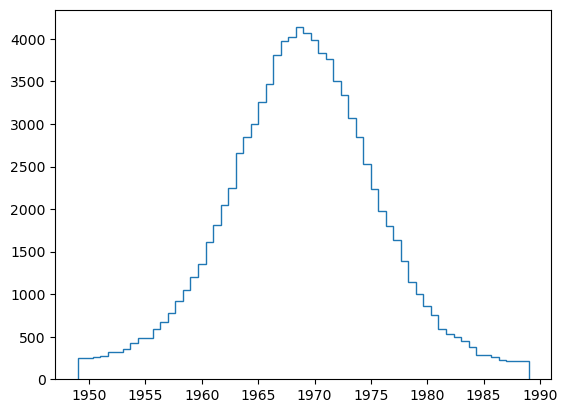

In [4]:
columns = ["runNumber","eventNumber", "totCandidates", "nCandidate", "nVeloTracks", "nPVs", "piz_PE", "piz_PX", "piz_PY", "piz_PZ", "piz_PT","piz_M",
           "Ds_PE", "Ds_PX", "Ds_PY", "Ds_PZ", "Ds_PT","Ds_M", "Ds0M", "Ds0_M"]

df = rsh.rdf_to_pdf(tdf_data, columns)

plt.hist(pd.unique(df["Ds_M"]), bins=60, histtype="step")

### $\mathtt{runNumber}$ check

In [5]:
runNumber = df["runNumber"]

runs = pd.unique(runNumber)

print("Number of runs in our data :", len(runs))
print("Runs of our data :", runs)

events_in_1_run = pd.unique((df.query("runNumber=={0}".format(runs[0])))["eventNumber"])

for i in range(len(runs)):
    print("----------------------------------------------------------------------------")
    events_in_1_run = pd.unique((df.query("runNumber=={0}".format(runs[i])))["eventNumber"])
    print("Number of Events in run = {0} :".format(runs[i]), len(events_in_1_run))
print("----------------------------------------------------------------------------")

Number of runs in our data : 892
Runs of our data : [207213 208051 207522 213063 211761 216048 216754 212123 212316 212294
 212233 212229 212308 216269 211757 211418 211572 211694 211665 212088
 216152 216662 216274 216165 216101 216212 216003 216264 216047 207200
 217108 211955 211826 211850 211691 212120 211756 212231 211840 216679
 208478 213385 211558 208117 208033 208130 208140 208049 208411 208203
 208352 216026 207391 213172 212262 216665 216832 216869 217079 216911
 217115 217095 217071 213222 213314 211685 211632 211657 211699 212094
 216261 212927 212319 212286 207085 216085 206592 207209 207581 212196
 213207 213086 213338 212091 211554 211613 211932 208021 213361 211769
 211416 211625 211825 216094 208172 207735 212992 208485 212785 213096
 211828 212263 216260 212203 211941 212259 212321 212093 216779 211764
 211947 211796 211514 211693 212124 212199 213154 213225 213158 213284
 213282 212866 213297 207924 207521 207947 207510 207517 207542 207471
 207989 208034 208088 206

### Number of $D_s^+$ and $\pi^0$ in 1 run

In [6]:
eventNumber = pd.unique((df.query("runNumber=={0}".format(runs[0])))["eventNumber"])

evt = rsh.CompactEvent_def(df, runs[0], eventNumber[0])

evt

Event 9591109 in run 207213
nPVs = 1
nVeloTracks = 80
Particles:
{'Ds': [Ds Particle: MomentumObject4D(px=6149.92, py=4046.49, pz=74061.05, E=74452.26948642332)], 'piz': [piz Particle: MomentumObject4D(px=952.59, py=1019.94, pz=13852.86, E=13923.568524960545)]}

### Event mixing try

In [7]:
Total_Dspiz_mixed_M = [ ]

for i in range(len(runs)):
    
    events_in_run = rsh.events_in_1_run(df, runs[i])

    Dspiz_mixed_M = (rsh.event_mixing(events_in_run, 1300))["Dspiz_M"]
    
    Total_Dspiz_mixed_M += Dspiz_mixed_M

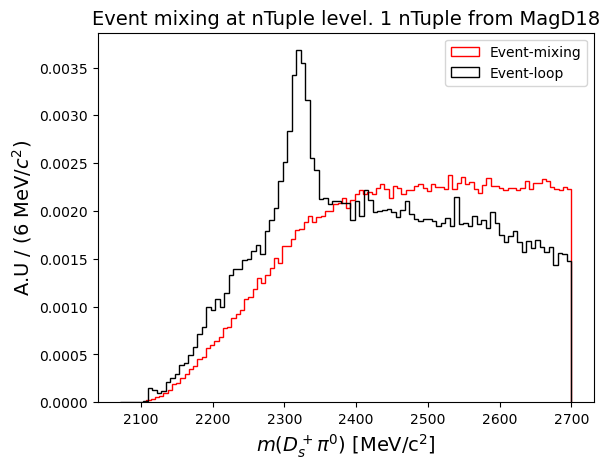

In [8]:
plt.hist([Total_Dspiz_mixed_M[i] for i in range(len(Total_Dspiz_mixed_M)) if Total_Dspiz_mixed_M[i] < 2700], bins=100, histtype="step",color="red",density=True, label="Event-mixing")
plt.hist(df.query("Ds0M < 2700")["Ds0M"], bins=100, histtype="step", color="black", density=True, label="Event-loop")
plt.legend()
plt.title("Event mixing at nTuple level. 1 nTuple from MagD18", fontsize = 14)
plt.xlabel(r"$m(D_s^+\pi^0)$ [$\mathrm{MeV/c^2}$]", fontsize = 14)
plt.ylabel(r"A.U / (6 MeV/$c^2$)", fontsize = 14)
plt.savefig("Graphs/Exp_MagD18_Dspi0L_mass_evt_mix.pdf", dpi=300, bbox_inches = 'tight')

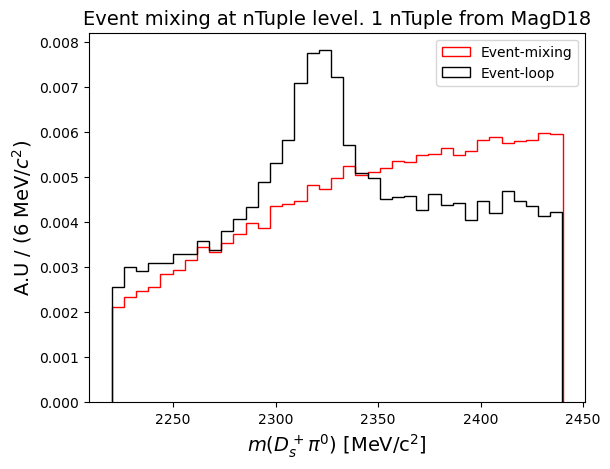

In [9]:
small_Dspiz_mixed_M = [Total_Dspiz_mixed_M[i] for i in range(len(Total_Dspiz_mixed_M)) if Total_Dspiz_mixed_M[i] > 2220 and Total_Dspiz_mixed_M[i] < 2440]
plt.hist(small_Dspiz_mixed_M, bins=37, histtype="step",color="red",density=True, label="Event-mixing")
plt.hist(df.query("Ds0M > 2220 & Ds0M < 2440")["Ds0M"], bins=37, histtype="step", color="black", density=True, label="Event-loop")
plt.legend()
plt.title("Event mixing at nTuple level. 1 nTuple from MagD18", fontsize = 14)
plt.xlabel(r"$m(D_s^+\pi^0)$ [$\mathrm{MeV/c^2}$]", fontsize = 14)
plt.ylabel(r"A.U / (6 MeV/$c^2$)", fontsize = 14)
plt.savefig("Graphs/Exp_MagD18_Dspi0L_mass_evt_mix_2.pdf", dpi=300, bbox_inches = 'tight')

## MC event mixing: background comparison

In [10]:
priv = False
Filt = False

if priv:
    MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Private/'
else:
    if Filt:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/TightCut/'
    else:
        MC_path = '/scratch42/ivan.cambon/DsJ_Spectroscopy/MC/Official/DecProdCut/'
        
MC_files = "Ds0DsPi0*.root"

tdf_MC = ROOT.RDataFrame(dtt+"/DecayTree", MC_path+MC_files)
tdf_MC = tdf_MC.Define("Ds0M", "Ds0_M-piz_M+135-Ds_M+1969")

In [11]:
anti_TRUEID_1 = "abs(Kpl_MC_GD_MOTHER_ID) != 10431 | abs(Kmi_MC_GD_MOTHER_ID) != 10431 | abs(pi_MC_GD_MOTHER_ID) != 10431 | abs(gamma_1_MC_GD_MOTHER_ID) != 10431 | abs(gamma_2_MC_GD_MOTHER_ID) != 10431"
anti_TRUEID_2 = "(abs(Kpl_MC_GD_MOTHER_ID) == 10431 && abs(Kmi_MC_GD_MOTHER_ID) == 10431 && abs(pi_MC_GD_MOTHER_ID) == 10431) && (abs(gamma_1_MC_GD_MOTHER_ID) != 10431 | abs(gamma_2_MC_GD_MOTHER_ID) != 10431)"
anti_TRUEID_3 = "(abs(Kpl_MC_GD_MOTHER_ID) != 10431 | abs(Kmi_MC_GD_MOTHER_ID) != 10431 | abs(pi_MC_GD_MOTHER_ID) != 10431)"

TRUEID = "gamma_1_MC_GD_MOTHER_ID == 10431 && gamma_2_MC_GD_MOTHER_ID == 10431"


print("Ds0DsPi0MC total background candidates = {0}".format(tdf_MC.Filter(anti_TRUEID_1).Count().GetValue()))
print("Ds0DsPi0MC background candidates (random photons) = {0}".format(tdf_MC.Filter(anti_TRUEID_2).Count().GetValue()))
print("Ds0DsPi0MC background candidates (random Ds)= {0}".format(tdf_MC.Filter(anti_TRUEID_3).Count().GetValue()))

tdf_MC_bkg_1 = tdf_MC.Filter(anti_TRUEID_1+"&&"+sel)
df_MC_bkg_1 = rsh.rdf_to_pdf(tdf_MC_bkg_1, columns)

tdf_MC_sig = tdf_MC.Filter(TRUEID)
df_MC_sig = rsh.rdf_to_pdf(tdf_MC_sig, columns)

Ds0DsPi0MC total background candidates = 19872
Ds0DsPi0MC background candidates (random photons) = 17945
Ds0DsPi0MC background candidates (random Ds)= 1927


In [12]:
tdf_MC_bkg = tdf_MC.Filter(sel)
df_MC_bkg = rsh.rdf_to_pdf(tdf_MC_bkg, columns)

MC_runNumber = df_MC_bkg["runNumber"]

MC_runs = pd.unique(MC_runNumber)

MC_Dspiz_mixed_M = [ ]

for i in range(len(MC_runs)):
    
    MC_events_in_run = rsh.events_in_1_run(df_MC_bkg, MC_runs[i])

    Sim_Dspiz_mixed_M = (rsh.event_mixing(MC_events_in_run, 1300))["Dspiz_M"]
    
    MC_Dspiz_mixed_M += Sim_Dspiz_mixed_M

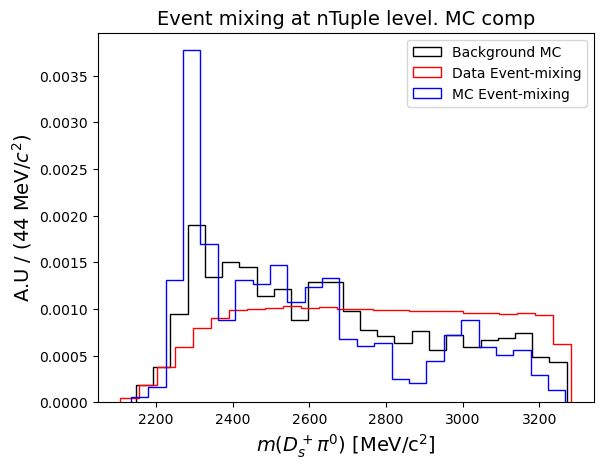

In [13]:
plt.hist(df_MC_bkg_1["Ds0M"], bins=25, histtype="step", color="black",density=True, label="Background MC")
plt.hist(Total_Dspiz_mixed_M, bins=25, histtype="step",color="red", density=True, label="Data Event-mixing")
plt.hist(MC_Dspiz_mixed_M, bins=25, histtype="step",color="blue", density=True, label="MC Event-mixing")
plt.legend()
plt.title("Event mixing at nTuple level. MC comp", fontsize = 14)
plt.xlabel(r"$m(D_s^+\pi^0)$ [$\mathrm{MeV/c^2}$]", fontsize = 14)
plt.ylabel(r"A.U / (44 MeV/$c^2$)", fontsize = 14)

plt.savefig("Graphs/Comp_Dspi0L_mass_evt_mix.pdf", dpi=300, bbox_inches = 'tight')